## Content

1. Foreword
2. Loading and Visualizing data
3. Feature mapping
4. Feature normalization
5. Training the model
6. Plot the decision boundary
7. Accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Foreword

You should read `classification-lib` first, most of the detail explanation I left there.

## 2. Loading and Visualizing data

In [2]:
# The data is from Coursera Machine Learning course/week3/ex2data2.txt
data = np.loadtxt('../data/data4.txt', delimiter = ',')

# Some useful variable 
m = data.shape[0]      # Number of training examples
n = data.shape[1] - 1  # Number of features

X = data[:, 0:n]  # Score of two different tests on a microchip
Y = data[:, n, np.newaxis]  # The microchip is accepted/rejected (1/0)

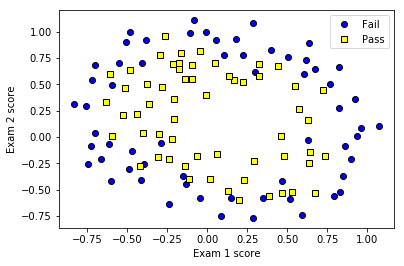

In [3]:
figureId = 1

def plotData(X, Y):
    global figureId
    plt.figure(figureId)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    neg = np.where(Y == 0)[0]  # index of rejected examples
    pos = np.where(Y == 1)[0]  # index of accepted examples
    plt.plot(X[neg, 0], X[neg, 1], 'o', color = 'blue', mec = 'black', label = 'Fail')
    plt.plot(X[pos, 0], X[pos, 1], 's', color = 'yellow', mec = 'black', label = 'Pass')
    plt.legend(loc = 'upper right')
    plt.draw()
    
    figureId += 1
    
plotData(X, Y)
plt.show()

## 3. Feature mapping

In [4]:
def map_feature(X1, X2, degree):
    X1 = np.atleast_1d(X1)  # Wrap in an array
    X2 = np.atleast_1d(X2)
    X = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            new_feature = (X1**(i - j)) * (X2**j)
            X = np.column_stack((X, new_feature))
    return X

# Map original features to polynomial features
# in order to fit data better
degree = 6  # Highest degree of polynomial features
X = map_feature(X[:, 0, np.newaxis], X[:, 1, np.newaxis], degree)

## 4. Feature normalization

In [5]:
# Feature Normalization using Standardizatino
mu = np.mean(X[:, 1::], axis = 0)  # Excluding bias term at X[:, 0]
sd = np.std(X[:, 1::], axis = 0)
X[:, 1::] = (X[:, 1::] - mu) / sd

## 5. Training the model

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_gradient_descent(X, Y, w_init, alpha, lamba, max_iter = 10000):
    w = w_init
    iter = 0
    global m
    n = X.shape[1]
    while iter < max_iter:
        # Batch gradient descent
        error = sigmoid(X.dot(w)) - Y
        w = w - alpha * (1 / m) * X.T.dot(error) - lamda * (1 / (n - 1)) * w
        w[0] += lamda * (1 / (n - 1)) * w[0]  # No regularize bias term w[0]
        
        iter += 1
    return w

# Define parameters for Gradient Descent
alpha = 0.5  # Learning rate
lamda = 1    # Regularization term lambda
w_init = np.zeros((X.shape[1], 1))

# Training model
w = logistic_gradient_descent(X, Y, w_init, alpha, lamda)
print('Trained coefficients: \n', w[0::])

Trained coefficients: 
 [[-0.21320808]
 [ 0.29050681]
 [ 0.51344552]
 [-0.41470818]
 [-0.32205685]
 [-0.37278621]
 [ 0.15626028]
 [ 0.09937543]
 [-0.02869429]
 [ 0.08291006]
 [-0.43106297]
 [-0.05258499]
 [-0.22727667]
 [-0.13521405]
 [-0.38949718]
 [-0.03242277]
 [-0.02584898]
 [ 0.13273112]
 [-0.09370624]
 [-0.15270148]
 [-0.1166429 ]
 [-0.37328821]
 [ 0.02464111]
 [-0.23309877]
 [ 0.05819058]
 [-0.27040301]
 [-0.08390684]
 [-0.32362774]]


## 6. Plot the decision boundary

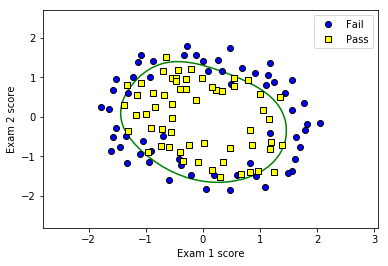

In [7]:
# Plot the training data
plotData(X[:, 1:3], Y)

# Plot decision boundary using contour
# Take min, max of X1, X2 BEFORE normalizing
x1_min, x1_max = data[:, 0].min() - .5, data[:, 0].max() + .5
x2_min, x2_max = data[:, 1].min() - .5, data[:, 1].max() + .5
h = .05  # Step size in the mesh
xx1, xx2 = np.mgrid[x1_min:x1_max:h, x2_min:x2_max:h]
yy = map_feature(xx1.ravel(), xx2.ravel(), degree)
yy[:, 1::] = (yy[:, 1::] - mu) / sd
yy = yy.dot(w)
yy = yy.reshape(xx1.shape)

xx1 = (xx1 - mu[0]) / sd[0]
xx2 = (xx2 - mu[1]) / sd[1]

plt.contour(xx1, xx2, yy, levels = [0], colors = 'green')
plt.draw()
plt.show()

## 7. Accuracy

In [11]:
def predict(X, w):
    return np.floor(sigmoid(X.dot(w)) + 0.5)

Y_pred = predict(X, w)
print('Accuracy = %f' % (np.mean(Y_pred == Y) * 100))

Accuracy = 83.898305
